In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('2023-01-27_Katarina_pulsed_05-1s_formation_C3D5_Cell112_Channel_59_Wb_1.csv')

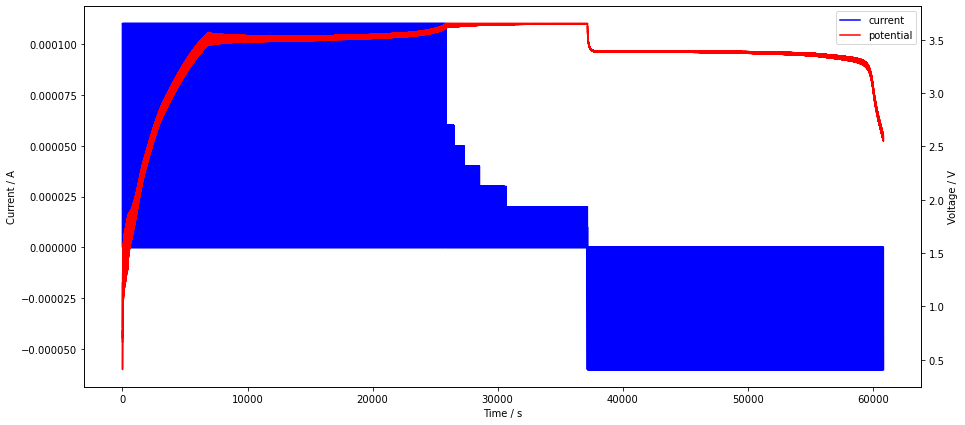

In [3]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax1 = plt.subplots()

ax1.plot(data['Test_Time(s)'], data['Current(A)'], '-b', label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.plot(data['Test_Time(s)'], data['Voltage(V)'], '-r', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()

In [4]:
step = list(data['Step_Index'])
current = list(data['Current(A)'])
voltage = list(data['Voltage(V)'])

CC_charge_current_on = []
CC_charge_current_off = []
CC_charge_potential_on = []
CC_charge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==1 or step[i]==2:
        if current[i]!=current[i-1] and step[i]==1 and i>0:
            CC_charge_current_off.append(tempcurr)
            CC_charge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==2 and i>0:
            CC_charge_current_on.append(tempcurr)
            CC_charge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_charge_current_on))
print(len(CC_charge_current_off))
print(len(CC_charge_potential_on))
print(len(CC_charge_potential_off))
print('\n')
print(CC_charge_current_on[0:2])
print(CC_charge_current_off[0:2])
print('\n')
print(CC_charge_potential_on[0:2])
print(CC_charge_potential_off[0:2])

16448
16448
16448
16448


[[0.00011, 0.00011, 0.00011], [0.00011, 0.00011, 0.00011]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


[[0.66712, 0.85699, 0.85699], [0.91803, 1.0205, 1.0205]]
[[0.53799, 0.47102, 0.43304, 0.40756, 0.40756], [0.65964, 0.5867, 0.54555, 0.51611, 0.51611]]


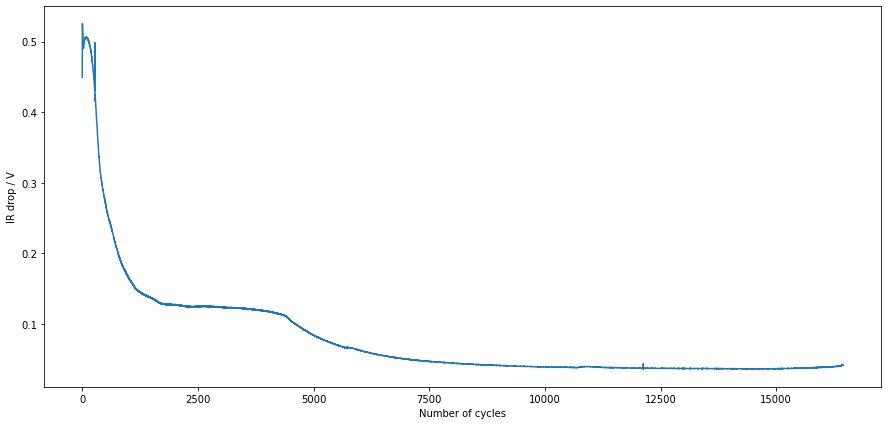

In [5]:
# pseudo IR drop

IRdrop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][-1]
    IRdrop.append(x)

plt.plot(IRdrop)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [6]:
# Charging pseudo IR drop

print(f'Number of cycles: {len(IRdrop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IRdrop[0]}')
print(f'IR drop at 2% state of charge: {IRdrop[round(len(IRdrop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IRdrop[round(len(IRdrop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IRdrop[round(len(IRdrop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IRdrop[round(len(IRdrop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IRdrop[round(len(IRdrop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IRdrop[round(len(IRdrop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IRdrop[round(len(IRdrop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IRdrop[round(len(IRdrop)*0.95)]}')

Number of cycles: 16448


IR drop at 0% state of charge: 0.44943000000000005
IR drop at 2% state of charge: 0.3682000000000001
IR drop at 5% state of charge: 0.19040000000000012
IR drop at 10% state of charge: 0.13050000000000006
IR drop at 20% state of charge: 0.12270000000000003
IR drop at 50% state of charge: 0.043500000000000316
IR drop at 70% state of charge: 0.037900000000000045
IR drop at 90% state of charge: 0.03630000000000022
IR drop at 95% state of charge: 0.03750000000000009


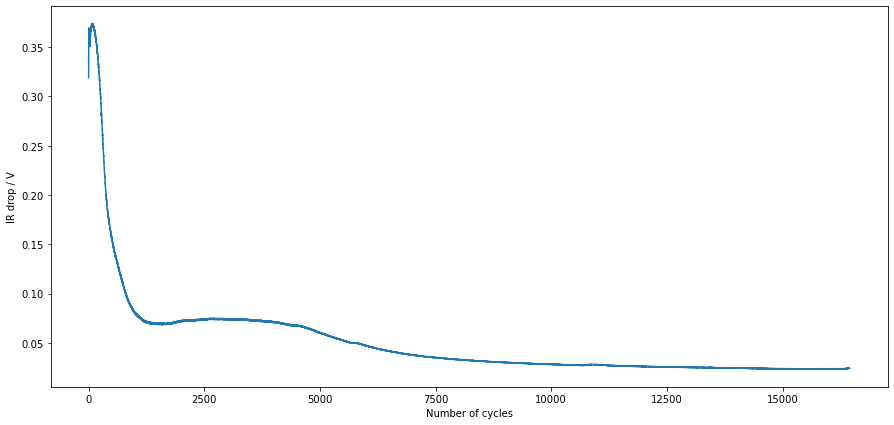

In [13]:
# IR drop

IR_drop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][0]
    IR_drop.append(x)

plt.plot(IR_drop)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [14]:
# Charging IR drop

print(f'Number of cycles: {len(IR_drop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IR_drop[0]}')
print(f'IR drop at 2% state of charge: {IR_drop[round(len(IR_drop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IR_drop[round(len(IR_drop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IR_drop[round(len(IR_drop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IR_drop[round(len(IR_drop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IR_drop[round(len(IR_drop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IR_drop[round(len(IR_drop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IR_drop[round(len(IR_drop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IR_drop[round(len(IR_drop)*0.95)]}')

Number of cycles: 16448


IR drop at 0% state of charge: 0.31900000000000006
IR drop at 2% state of charge: 0.2348999999999999
IR drop at 5% state of charge: 0.09750000000000014
IR drop at 10% state of charge: 0.06879999999999997
IR drop at 20% state of charge: 0.0737000000000001
IR drop at 50% state of charge: 0.03200000000000003
IR drop at 70% state of charge: 0.026699999999999946
IR drop at 90% state of charge: 0.023699999999999832
IR drop at 95% state of charge: 0.023600000000000065


In [7]:
# Discharge voltage drop

CC_discharge_current_on = []
CC_discharge_current_off = []
CC_discharge_potential_on = []
CC_discharge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==7 or step[i]==8:
        if current[i]!=current[i-1] and step[i]==7 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_off.append(tempcurr)
            CC_discharge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==8 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_on.append(tempcurr)
            CC_discharge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_discharge_current_on))
print(len(CC_discharge_current_off))
print(len(CC_discharge_potential_on))
print(len(CC_discharge_potential_off))
print('\n')
print(CC_discharge_current_on[0:2])
print(CC_discharge_current_off[0:2])
print('\n')
print(CC_discharge_potential_on[0:2])
print(CC_discharge_potential_off[0:2])

15077
15077
15077
15077


[[-6e-05, -6e-05, -6e-05], [-6e-05, -6e-05, -6e-05]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]


[[3.6282, 3.6173, 3.6173], [3.6113, 3.6016, 3.6016]]
[[3.6252, 3.6271, 3.6281, 3.6288, 3.6288], [3.6118, 3.6142, 3.6156, 3.6165, 3.6165]]


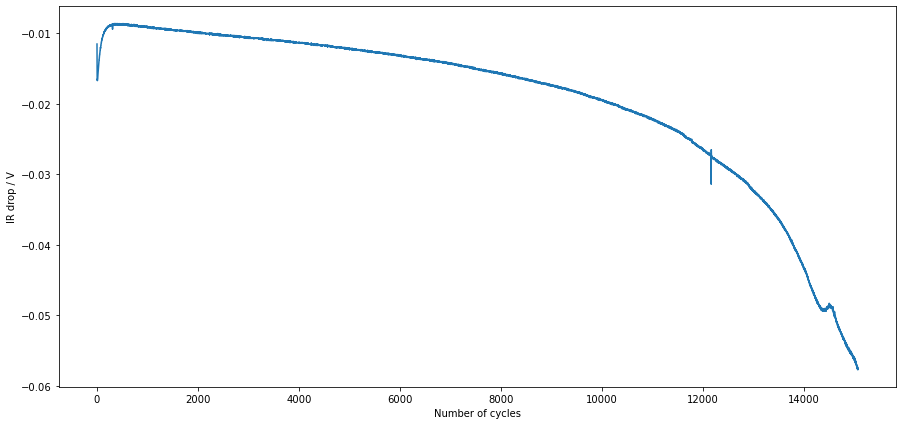

In [8]:
# pseudo IR drop

IRdrop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][-1]
    IRdrop_dis.append(x)

plt.plot(IRdrop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [9]:
print(f'Number of cycles: {len(IRdrop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IRdrop_dis[round(len(IRdrop_dis)*0.98)]}')

Number of cycles: 15077


IR drop at 5% state of discharge: -0.00890000000000013
IR drop at 10% state of discharge: -0.009500000000000064
IR drop at 20% state of discharge: -0.010600000000000165
IR drop at 50% state of discharge: -0.015000000000000124
IR drop at 70% state of discharge: -0.020999999999999908
IR drop at 90% state of discharge: -0.03710000000000013
IR drop at 95% state of discharge: -0.048900000000000166
IR drop at 98% state of discharge: -0.053199999999999914


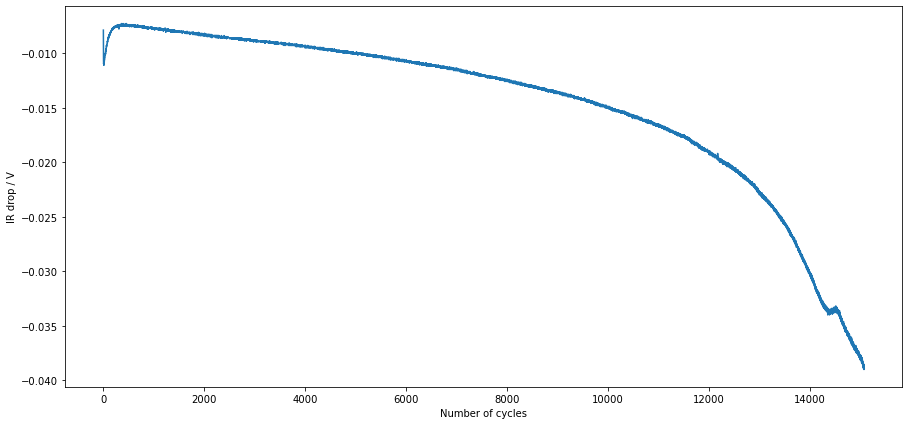

In [15]:
# IR drop discharge

IR_drop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][0]
    IR_drop_dis.append(x)

plt.plot(IR_drop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [16]:
# pseudo IR drop

print(f'Number of cycles: {len(IR_drop_dis)}')
print('\n')
print(f'IR drop at 5% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.05)]}')
print(f'IR drop at 10% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.1)]}')
print(f'IR drop at 20% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.2)]}')
print(f'IR drop at 50% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.5)]}')
print(f'IR drop at 70% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.7)]}')
print(f'IR drop at 90% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.9)]}')
print(f'IR drop at 95% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.95)]}')
print(f'IR drop at 98% state of discharge: {IR_drop_dis[round(len(IR_drop_dis)*0.98)]}')

Number of cycles: 15077


IR drop at 5% state of discharge: -0.007600000000000051
IR drop at 10% state of discharge: -0.008100000000000218
IR drop at 20% state of discharge: -0.00890000000000013
IR drop at 50% state of discharge: -0.012100000000000222
IR drop at 70% state of discharge: -0.015899999999999803
IR drop at 90% state of discharge: -0.026200000000000223
IR drop at 95% state of discharge: -0.033600000000000296
IR drop at 98% state of discharge: -0.03610000000000024


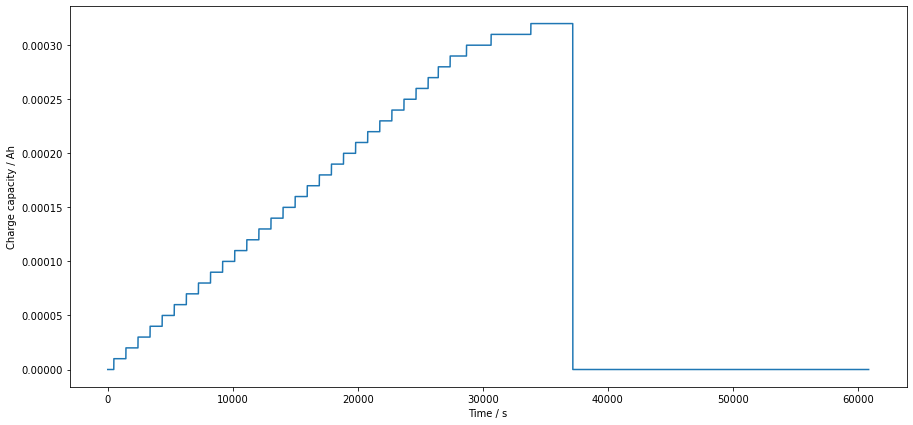

In [10]:
plt.plot(data['Test_Time(s)'], data['Charge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Charge capacity / Ah')

plt.show()

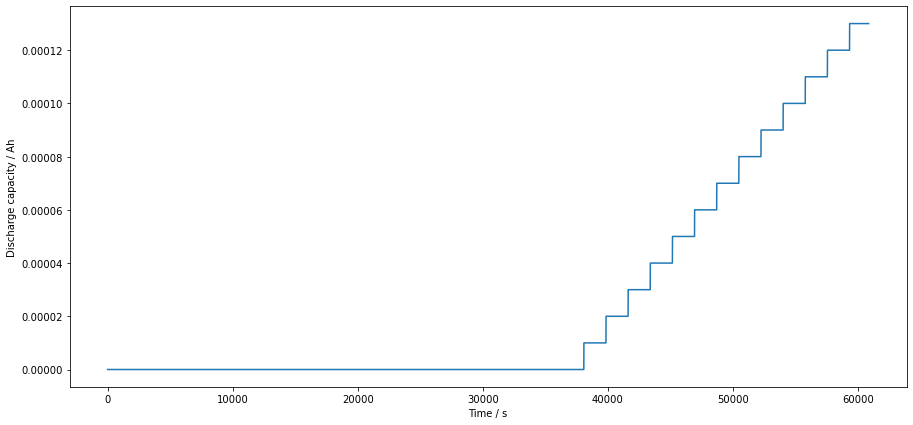

In [11]:
plt.plot(data['Test_Time(s)'], data['Discharge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Discharge capacity / Ah')

plt.show()

In [12]:
step = data['Step_Index']
time = data['Test_Time(s)']
current = data['Current(A)']

charge_time = []
charge_current = []
discharge_time = []
discharge_current = []
for i in range(len(current)):
    if step[i]==1 or step[i]==2 or step[i]==3 or step[i]==4:
        charge_time.append(time[i])
        charge_current.append(current[i])
    elif step[i]==7 or step[i]==8:
        discharge_time.append(time[i])
        discharge_current.append(current[i])

C=np.trapz(x=charge_time, y=charge_current)
C=C*1000/3600
print(f'Charge capacity: {round(C,2)} mAh.')

D=np.trapz(x=discharge_time, y=discharge_current)
D=D*1000/3600
print(f'Discharge capacity: {round(D,2)} mAh.')

Charge capacity: 0.29 mAh.
Discharge capacity: -0.13 mAh.
